# Group 004-9 Final Project Proposal

## INTRODUCTION
### *(1) Background Introduction :*

A group of researchers at UBC Computer Science wanted to understand how people play video games. One of their methods was creating a custom Minecraft server that can be automatically recorded per players’ session. 

The questions they had:
* What kinds of players tend to play the most?
* Demand forecasting: when do most players tend to play?
* Can we tell whether a player will continue to contribute given past play sessions and demographics?

The question we are focusing on:
* which kind of people are willing to play more. The response variable of interest will be experience, subscribe, gender, and age and the explanatory variables will be played_hours. People who played the most hours will contribute a large amount of data, and the explanatory variable will help to understand which kind of players may willing to play longer hours.

With this, we as data scientists were given the following data to work with:
* Player skill levels and demographic information
* Past play sessions

### *(2) Data Description:*
We will be working with the Players dataset (players.csv)

This dataset compiles the statistics on 196 observations of individual players on the Minecraft Server. The information in this dataset includes 9 variables including 
* `experience` (chr) - player's experience (Amateur, Pro, Beginner, Regular, Veteran)
* `subscribe` (lgl) - whether the player subscribes to the server or not
* `hashedEmail` (chr) - player's hashed email
* `played_hours` (dbl) - total hours the player spent playing
* `name` (chr) - player's name
* `gender` (chr) - player's gender
* `age` (dbl) - player's age (years)
* `individualID` (lgl) - player's individual ID
* `organizationName` (lgl) - player's organization name
  
**potential issues in the data**
* All the data in the "individualID" & "organizationName" are missing.
  
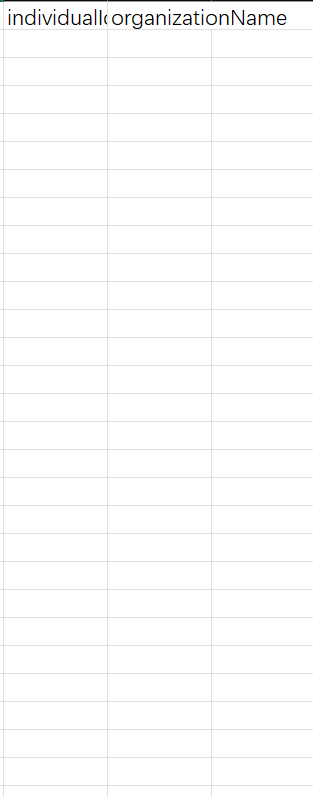
* Some data may not make sense. For example, there are players who are 91 and 99 years old.

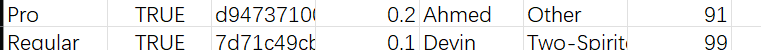 

**any other potential issues**
* Players may have different understandings of experience levels, leading to errors in their chosen experience level. 


### (3) Question we tried to answer

We are interested in seeing which “kinds” of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. 

Our response variable will be played_hours, as the hours played by a player would be a good indication on their contribution to the data. On the other hand, we will use expeience, subscribe, age and gender as our explanatory variables. 


## METHODS & RESULTS 

Since we are aiming to address which "kinds" of players are most likely to contribute a larger amount of playing hours. We will be using a linear regression model in order to analyze our data. 

We will be using a linear regression model since our response variable, played_hours is continuous. With a linear regression model, we will be able to further analyze our data and relationships to see what influences the contribution from players according to the "kinds" of players.


### 1. Loading Library & Data
First we will be loading the necessary libraries and the Players data set. We will assign the players.csv data set into an object called `players_data`.

In [30]:
#(1) Loading Library & Data
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

players_data<-read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
players_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


### 2. Wrangling & Cleaning Data
Next we will be wrangling and cleaning our data set by 
1. excluding outliers of players aged 90 and above
2. excluding outliers of players with 0 played hours.
3. changing experience, gender and suscribe into a factor 

The wrangled & cleaned data set will be assigned to an object called `players_cleaned`.

In [31]:
#(2) Wrangling & Cleaning Data
players_cleaned <- players_data |> 
  select(played_hours, gender, age, experience, subscribe) |>  
  filter(age < 90, played_hours > 0) |>  
  mutate(
    experience = as.factor(experience),  
    gender = as.factor(gender),          
    subscribe = as.factor(subscribe)     
  )
players_cleaned

played_hours,gender,age,experience,subscribe
<dbl>,<fct>,<dbl>,<fct>,<fct>
30.3,Male,9,Pro,TRUE
3.8,Male,17,Veteran,TRUE
0.7,Female,21,Amateur,TRUE
⋮,⋮,⋮,⋮,⋮
0.1,Female,44,Veteran,TRUE
0.3,Male,22,Veteran,FALSE
2.3,Male,17,Amateur,FALSE


### 3. Summarizing of Data 
After that, we will be creating a summary of the data set that is relevant for exploratory data analysis related to the planned analysis. We are doing this by grouping according to age, gender, experience and subscribe. To find an average of played hours for each specific age, gender, experience type and wether the player subscribes. The summarized tables will be assigned to objects called `experience_summary`, `gender_summary`, `subscribe_summary` and `age_summary`.


In [32]:
#(3) performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 

experience_summary <- players_cleaned |> 
  group_by(experience) |> 
  summarise(
    avg_played_hours = mean(played_hours, na.rm = TRUE),
    total_players = n()
  )

gender_summary <- players_cleaned |> 
  group_by(gender) |> 
  summarise(
    avg_played_hours = mean(played_hours, na.rm = TRUE),
    total_players = n()
  )


subscribe_summary <- players_cleaned |> 
  group_by(subscribe) |> 
  summarise(
    avg_played_hours = mean(played_hours, na.rm = TRUE),
    total_players = n()
  )


age_summary <- players_cleaned |> 
  group_by(age) |> 
  summarise(
    avg_played_hours = mean(played_hours, na.rm = TRUE),
    total_players = n()
  )


age_summary
gender_summary
subscribe_summary
experience_summary

age,avg_played_hours,total_players
<dbl>,<dbl>,<int>
8,0.3,1
9,30.3,1
10,3.6,1
⋮,⋮,⋮
44,0.1,1
45,0.1,1
49,18.5,1


gender,avg_played_hours,total_players
<fct>,<dbl>,<int>
Agender,12.5000,1
Female,18.7381,21
Male,6.8240,75
Non-binary,37.2000,6
Prefer not to say,0.8200,5
Two-Spirited,0.4000,1


subscribe,avg_played_hours,total_players
<fct>,<dbl>,<int>
FALSE,1.04400,25
TRUE,13.32619,84


experience,avg_played_hours,total_players
<fct>,<dbl>,<int>
Amateur,10.831429,35
Beginner,2.300000,19
Pro,3.620000,10
Regular,34.494737,19
Veteran,1.196154,26


### 4. Visualization of Summary
We then need to plot from the data we have summarized in the above tibbles. The visualization will be assigned to several objects called `plot_experience`, `plot_gender`, `plot_subscribe`, and `plot_age`. This code can be seen below:

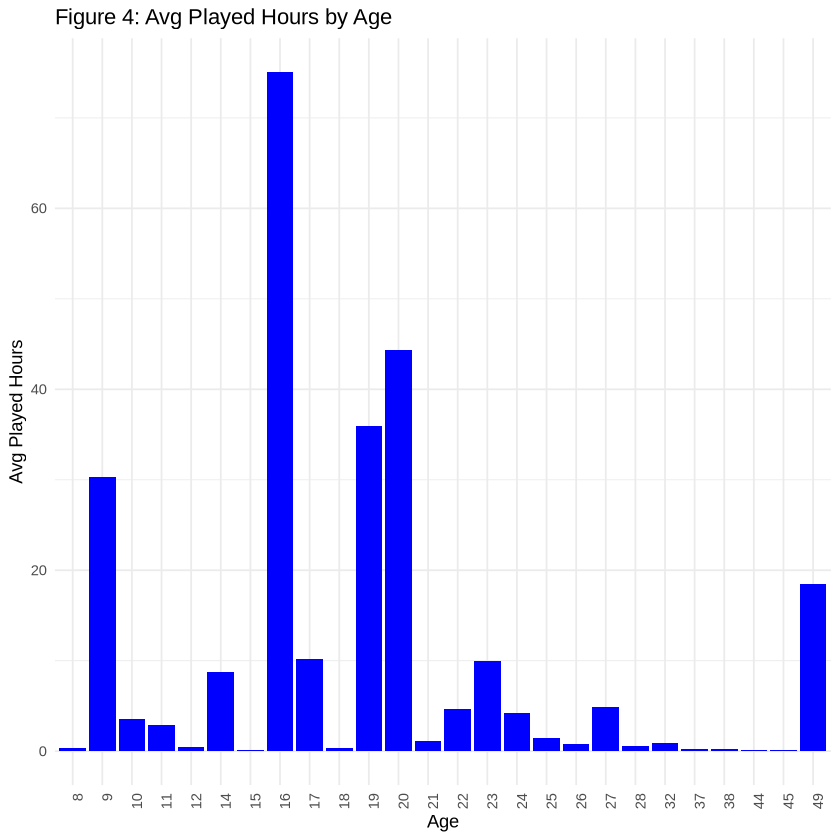

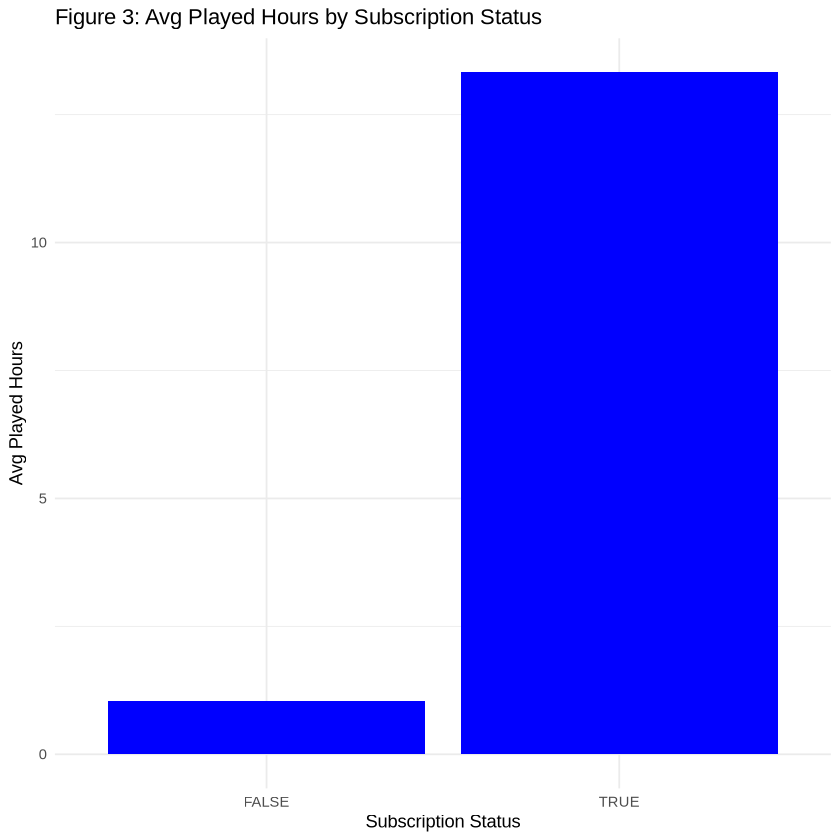

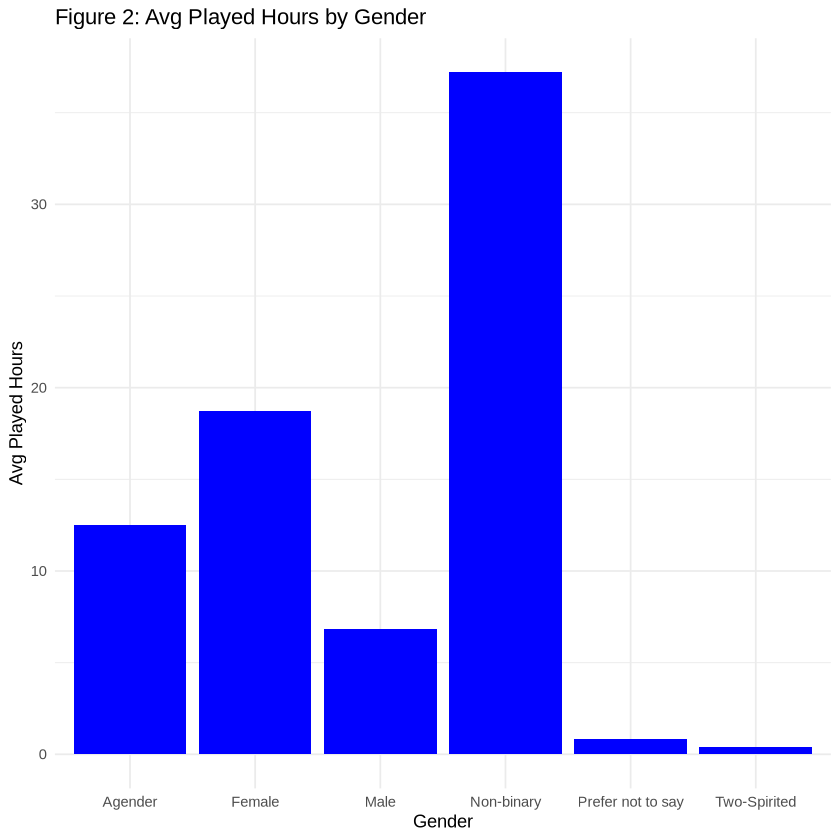

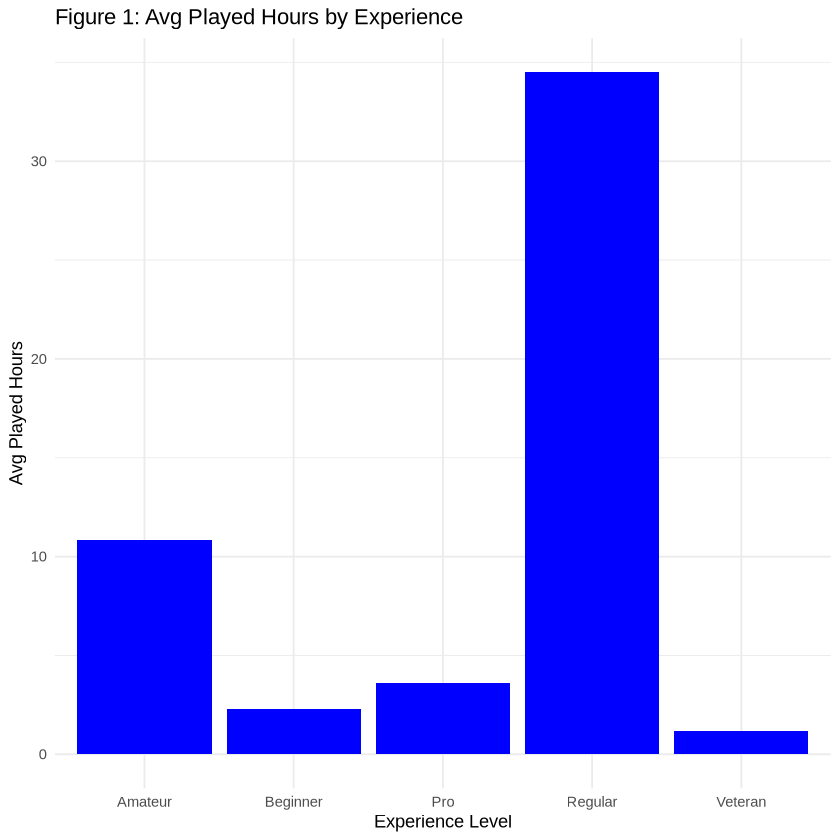

In [33]:
# Visualize the variables
plot_experience <- ggplot(experience_summary, aes(x = experience, y = avg_played_hours)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Figure 1: Avg Played Hours by Experience", x = "Experience Level", y = "Avg Played Hours") +
  theme_minimal()


plot_gender <- ggplot(gender_summary, aes(x = gender, y = avg_played_hours)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Figure 2: Avg Played Hours by Gender", x = "Gender", y = "Avg Played Hours") +
  theme_minimal()

plot_subscribe <- ggplot(subscribe_summary, aes(x = subscribe, y = avg_played_hours)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Figure 3: Avg Played Hours by Subscription Status", x = "Subscription Status", y = "Avg Played Hours") +
  theme_minimal()

plot_age <- ggplot(age_summary, aes(x = as.factor(age), y = avg_played_hours)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Figure 4: Avg Played Hours by Age", x = "Age", y = "Avg Played Hours") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


plot_age
plot_subscribe
plot_gender
plot_experience


### 5. Analysis
$\text{Data Analysis 1}$ :
With the first graph `plot_age`, we compare the average played hours and players' age to check which kind of players will more likely to contribute to our dataset. We notice that we should be focusing on $\text{16 years old players}$ since they have the highest average played hours. 

With the second graph `plot_subscribe`, we compare the average played hours and players' subscription status. We notice that we should be focusing on $\text{players who have decided to subscribe}$ since they have the highest average played hours. 

With the third graph `plot_gender`, we compare the average played hours and players'gender, and notice that we should be focusing on $\text{non-binary}$ since they have the highest average played hours. 

With the last graph `plot_experience`, we compare the average played hours and players'. We notice that $\text{regular experience players}$ have the highest average played hours, so we will be focusing on regular players. 



### 6. Build Model
First, we will be spliting up the data into a training set and a testing set. 75% of the data will be in the training set and assigned to `training_players` and 25% of the data will be in the testing set and assigned to `testing_players`. 

In [34]:
players_split<-initial_split(players_cleaned, prop=0.75, strata=played_hours)
training_players<-training(players_split)
testing_players<-testing(players_split)

Now that we have our training data, we will fit a linear regression model. 

We will be creating the model specification and assigning to an object called `pl_spec` and recipe and assigning it to `pl_recipe`. We will then create a workflow analysis to fit in the training data set and assign it to an object called `pl_fit`. We didn't scale and center the predictors since standardization doesn't affect too much on the fit. 

In [35]:
pl_spec<-linear_reg()|>
    set_engine("lm")|>
    set_mode("regression")

pl_recipe<-recipe(played_hours~age, data=training_players)

pl_fit<-workflow()|>
    add_recipe(pl_recipe)|>
    add_model(pl_spec)|>
    fit(data=training_players)
pl_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
    23.6245      -0.5584  


The coefficients mean that our prediction model will be $\text{played hours= 12.0646+(-0.2385)*age}$

Then we will be making predictions using `pl_fit` on the test data. We will be collecting the metrics and storing it in an object called `pl_test_results`.  

In [36]:
# Collect the metrics
pl_test_result<-pl_fit|>
predict(testing_players)|>
bind_cols(testing_players)|>
metrics(truth=played_hours, estimate=.pred) 

pl_test_result

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,15.159157916
rsq,standard,0.000131136
mae,standard,13.220873934


### 7. Visualization
In the following steps, we are trying to visualize the linear regression model and hoping to plot the predicted played hours for all possible ages. In the first step, we will be calculating the minimum and the maximum age and storing it in `age_prediction_grid`.

In [37]:
age_prediction_grid <- tibble(
    age = c(
        players_cleaned |> select(age) |> min(),
        players_cleaned |> select(age) |> max()))

age_prediction_grid

age
<dbl>
8
49


The minimum will be 8 and the maximum will be 49. Afterwards, we will connect them with a straight line, and put it in the original data. We will also assign an object `tidy_fit` which summarizes the results of the linear regression model `pl_fit`. We will assign our plot to an object called `age_plot_final`.

In [38]:
# We bind the columns for a prediction within the grid
players_preds <- pl_fit|>
predict(age_prediction_grid)|>
bind_cols(age_prediction_grid)
players_preds

# Summarize the results of the linear regression model
tidy_fit <- pl_fit |>
             extract_fit_parsnip() |>
             tidy()
tidy_fit

.pred,age
<dbl>,<dbl>
19.157317,8
-3.737162,49


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),23.6245330,16.4750247,1.4339604,0.1555300
age,-0.5584019,0.7814899,-0.7145351,0.4770025


Finally, the visualization of the analysis.

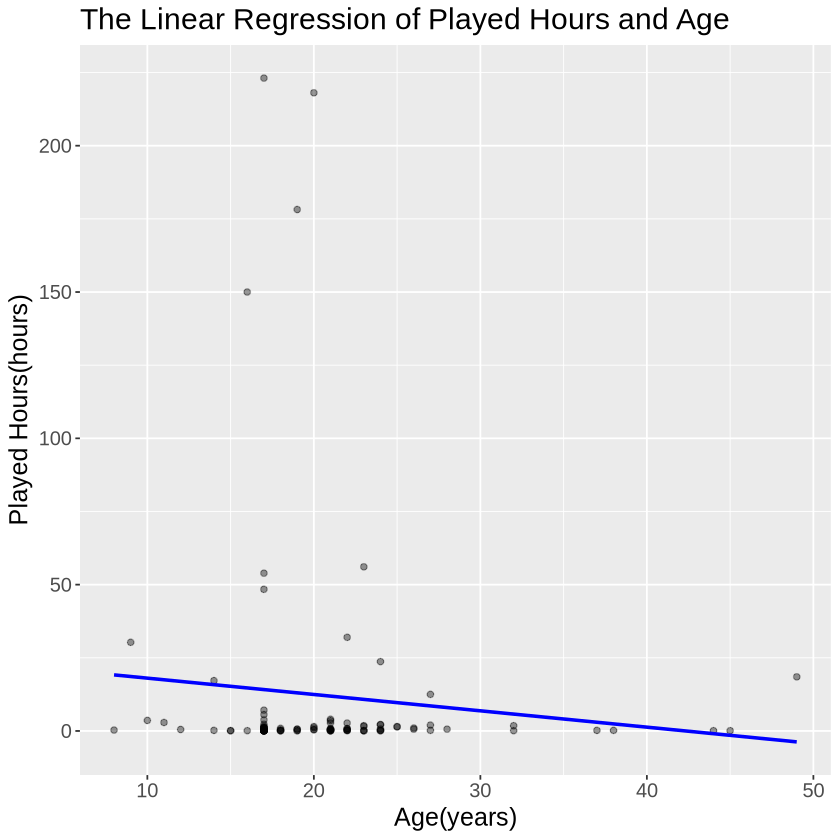

In [39]:
# Visualize
age_plot_final <- ggplot(players_cleaned, aes(x=age, y=played_hours))+
geom_point(alpha = 0.4)+
geom_line(data = players_preds, 
          mapping = aes(x = age, y = .pred),
          color = "blue",
          linewidth = 1)+
xlab("Age(years)")+
ylab("Played Hours(hours)")+
ggtitle("The Linear Regression of Played Hours and Age")+
theme(text=element_text(size=15))
age_plot_final
#creates a visualization of the analysis 

$\text{What does this graph tell us?}$

* The linear regression line is going downward, which means as age increases, the number of played hours will tend to decrease. This suggests that as players get older, their playtime tends to decrease. Younger players likely have more free time to dedicate to gaming, while older players may face additional responsibilities, such as work or family, that limit their gaming hours. While the overall trend is clear, there are outliers, particularly among young adults to middle-aged players, who log significantly higher playtimes. This trend highlights age as a potential factor influencing gaming behavior.

## Discussion:
### (1) What we found?
From the exploratory data analysis and the outputted plots:
- Experience: Regular players tend to have the highest average playtime, significantly more than beginners, amateurs, and veterans.
- Gender: Non-binary players showed the highest average playtime compared to other genders, with females playing more on average than males.
- Subscription Status: Subscribed players had much higher average playtime than unsubscribed ones.
- Age: Playtime varied widely by age, with the highest spikes at certain ages like 16, 19 and 20. However playtime generally was higher in lower ages except for a spike at age 49, an outlier.

### (2) Discuss whether this is what you expected to find?
#### Expected: 
- The correlation between subscription status and higher playtime aligns with expectations, as subscribers are likely to be more invested in the game.
- The sharp spikes in playtime at specific ages (16, 19, 20) were expected as these ages have the freedom and agency to play such video games like Minecraft in their free time.
#### Unexpected:
- The high playtime of "Regular" players compared to "Veterans" was surprising, as one might expect veterans to play the most.
- The high playtime of non-binary and female players compared to male and other genders is suprising, suggesting Minecraft, or in this case "Plaicraft" might appeal more broadly to diverse groups.
- The significant spike in playtime at age 49 was unexpected, as this is an age whereby people are usually still working, and hence should have just as little free time as older ages, but that was not the case. A case can also be made for the generally high playing times for 16-20 year olds, who would be in high school or university. This suggests that games such as Minecraft would be prioritized during their free time.
### (3) What impact could such findings have?
Game Design:
- Tailoring content for "Regular" players to maintain their engagement and to help prevent drop-offs into lower playtime categories like "Veterans", rather to stimulate them into playing more with said engagement.
- Creating inclusive environments that support underrepresented demographics like non-binary and female players.
- Events tailored more to less dominant male and other genders could stimulate higher playtime from them. If not, it's possible that this comes under game mechanics, labelling Minecraft as too "tame" for certain genders.
Subscription Models:
- Highlighting the value of subscriptions to non-subscribers with targeted promotions or additional benefits.
Player Retention:
- Developing age-specific features to capture the interests of players at the young adult ages of 16-20. However the cross-over with age 49 can give researcher's the conclusion that the game mechanics already work well enough given the large age span in playtime spikes. However, these generally older demographics suggest that developers could create harder game mechanics, to maintain engagement witht the population.
Marketing:
- Leveraging findings about demographic-specific engagement for targeted marketing campaigns.
### (4) What future questions could this lead to?
- Why do "Veteran" players have lower playtime? Is it due to burnout or lack of challenging content (i.e already beating the Enderdragon)?
- What specific game features drive the engagement of non-binary and female players?
- What factors contribute to the spikes in playtime at ages 9 15, and 20, then suddenly at 49? Are these tied to school holidays, free time, or developmental psychology?
- How can non-subscribers be incentivized to subscribe, and what are the barriers preventing them from doing so?
- Do these patterns of engagement hold across other games or genres, or are they unique to Minecraft?
